# Explore Trifeature Dataset

In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq

In [2]:
#data = pd.read_pickle(f"data/600AMeV_15dp.trifeature.pkl")
data = pq.read_table("data/600AMeV_30dp.trifeature.parquet").to_pandas()
print(data)

         nPN  nPP  nPH  nHits  nClus  Edep
4924763    5    5    5     93     45  1244
978592     1    1    1     16      6   361
499489     1    1    1     20     10   198
2083749    3    3    2     27     12   552
4277876    5    5    5     87     47  1316
...      ...  ...  ...    ...    ...   ...
3101903    4    4    4     55     18  1186
1400849    2    2    2     33     15   635
4123720    5    5    5    105     37  1635
2465393    3    3    2     65     19   878
4342909    5    5    4     90     32  1278

[4999569 rows x 6 columns]


In [3]:
r = range(1, 6)
hits = [
    np.histogram(
        data[data["nPH"] == n]["nHits"], range=(0, 150), bins=150, density=True
    )[0]
    for n in r
]
clus = [
    np.histogram(
        data[data["nPH"] == n]["nClus"], range=(0, 150), bins=150, density=True
    )[0]
    for n in r
]
edep = [
    np.histogram(
        data[data["nPH"] == n]["Edep"], range=(0, 2000), bins=200, density=True
    )[0]
    for n in r
]

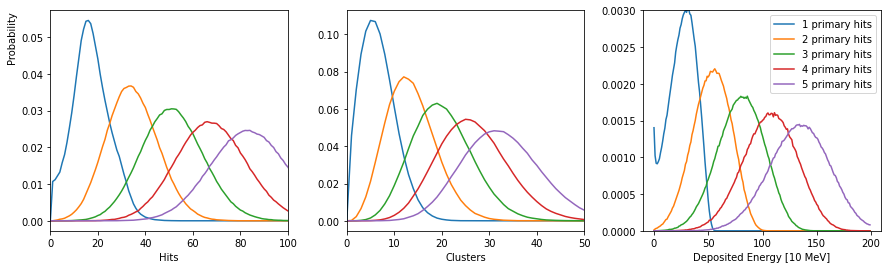

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2 * 6.224, 2 * (6.224 / 1.618 * 0.5)))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0, 100)
for h in hits:
    ax1.plot(h)
ax1.set_ylabel(r"Probability", horizontalalignment="right", y=1)
ax1.set_xlabel(r"Hits")

ax2 = fig.add_subplot(132)
ax2.set_xlim(0, 50)
for c in clus:
    ax2.plot(c)
ax2.set_xlabel(r"Clusters")

ax3 = fig.add_subplot(133)
ax3.set_ylim(0, 0.003)
for i, e in enumerate(edep, 1):
    ax3.plot(e, label=f"{i} primary hits")
ax3.set_xlabel(r"Deposited Energy [10 MeV]")

ax3.legend()

fig.tight_layout()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

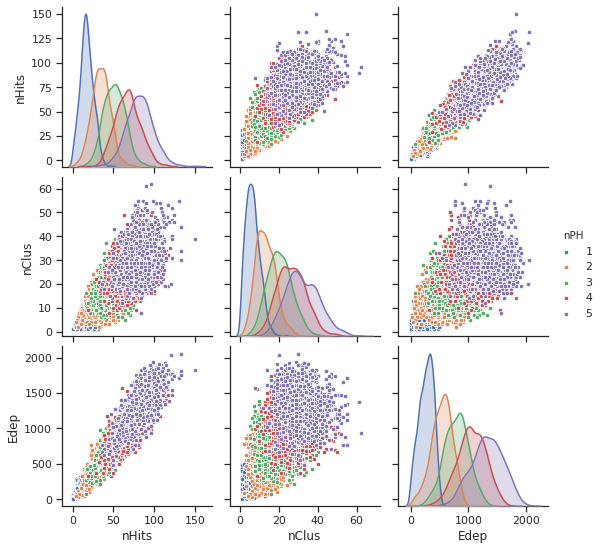

In [6]:
sample = data[data["nPH"] > 0].sample(frac=0.001)
sns.set(style="ticks", color_codes=True)
sns.pairplot(sample, vars=["nHits", "nClus", "Edep"], hue="nPH", plot_kws={"s": 20});